In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-9bf91bc92b75>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

In [ ]:
#### Add your code below following the instructions given in the course to complete the peer graded assignment


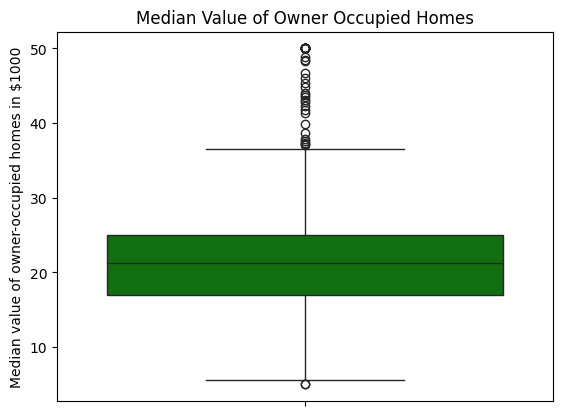

In [7]:
# 1. For the "Median value of owner-occupied homes" provide a boxplot

sns.boxplot(y='MEDV', data=boston_df, color='green')
plt.title('Median Value of Owner Occupied Homes')
plt.ylabel('Median value of owner-occupied homes in $1000')
plt.xlabel('')
plt.show()


<ipython-input-8-e33086e228e8>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  CHAS_barplot.set_xticklabels(['0 : Not near River','1 : Near River'])


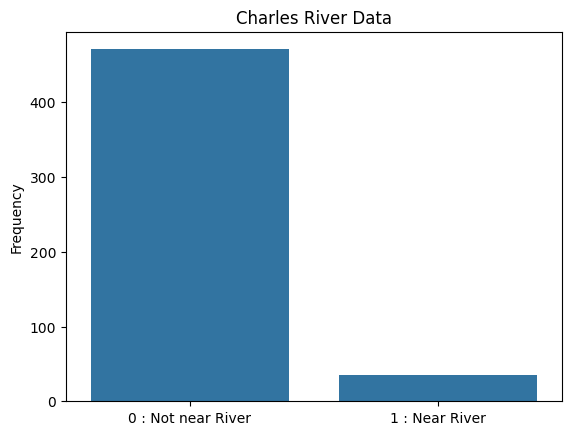

In [8]:
# 2. Provide a bar plot for the Charles river variable

boston_df['CHAS'] = boston_df['CHAS'].astype(int)
CHAS_barplot = sns.countplot(x='CHAS', data=boston_df)
plt.title('Charles River Data')
plt.ylabel('Frequency')
plt.xlabel('')
CHAS_barplot.set_xticklabels(['0 : Not near River','1 : Near River'])
plt.show()


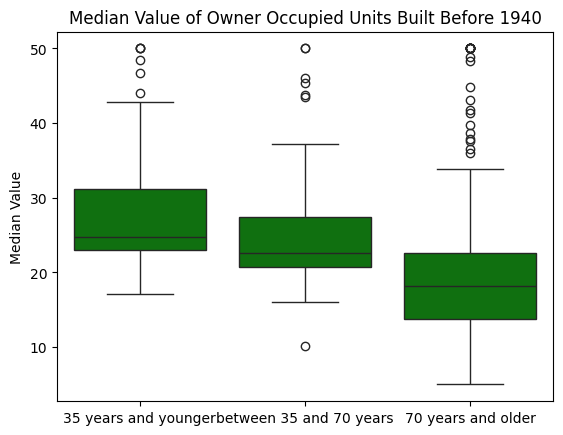

In [9]:
# 3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

# Making three age groups
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
age_group_order = ['35 years and younger','between 35 and 70 years', '70 years and older']
boston_df['age_group'] = pd.Categorical(boston_df['age_group'], categories=age_group_order, ordered=True)
# Generating boxplot
sns.boxplot(x='age_group', y='MEDV', data=boston_df, color='green')
plt.title('Median Value of Owner Occupied Units Built Before 1940')
plt.xlabel('')
plt.ylabel('Median Value')
plt.show()


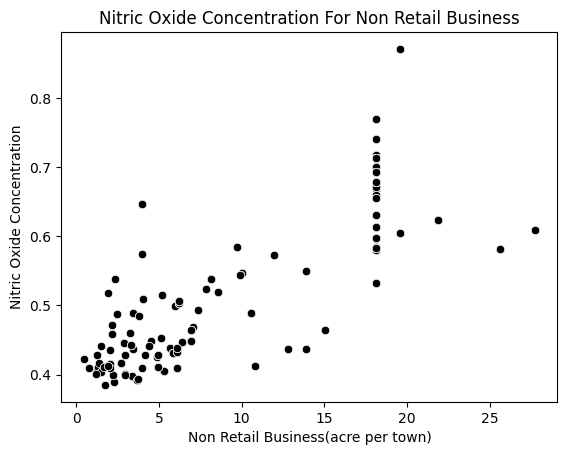

In [10]:
# 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?


sns.scatterplot(x = 'INDUS', y = 'NOX', data=boston_df, color='black')
plt.title('Nitric Oxide Concentration For Non Retail Business')
plt.xlabel('Non Retail Business(acre per town)')
plt.ylabel('Nitric Oxide Concentration')
plt.show()

# Comments : Initially the plot shows a linear behavior however after that the trend changes and a non linear behavior is observed

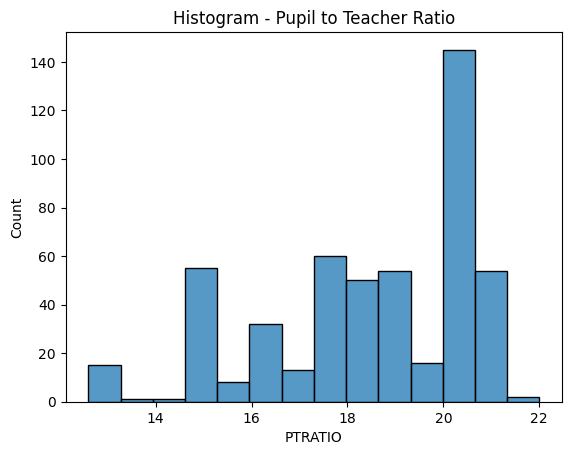

In [14]:
# 5. Create a histogram for the pupil to teacher ratio variable

sns.histplot(x='PTRATIO', data=boston_df)
plt.title('Histogram - Pupil to Teacher Ratio')
plt.show()

In [ ]:
######################################
################ TASK-2 ###############
######################################

In [16]:
# 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# Step-1 (Stating Hypothesis)
# Ho = Median Value of houses are independent of Charles River
# H1 = Median Value of houses bounded by Charles River differs

# Step - 2 (Checking dependent variable for normal distribution)
"""
sns.histplot(x='MEDV', kde=True, bins=20, color='green', data=boston_df)
plt.title('Normal distribution')
plt.xlabel('Median Value')
plt.ylabel('Frequency')
plt.show()
"""
# Comments : Can be considered as normaly distributed

# Step-3 (levene test)
levene = scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'])
print(levene)
# Comments : As p-value is .0326 this implies unequal variance but we shall proceed forward

# Step-4 (Conducting T-test)

T_1 = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)
print(T_1)
# Results : p-value = .0036
# Comments : As p-value is less than .05 therefore we reject null hypothesis and conclude that there is statistical evidence of difference in values of houses bounded by Charles River


LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)
TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)


In [21]:
# 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# Step-1 (Stating Hypothesis)
# Ho = There is not statistical difference in median value of houses for each proportion of units built before 1940s
# H1 = There is statistical difference in median value of houses for each proportion of units built before 1940s

# Step-2 (Grouping of AGE variable)
boston_df.loc[(boston_df['AGE'] <= boston_df['AGE'].median()), 'new_AGE'] = 'less and equal to 50'
boston_df.loc[(boston_df['AGE'] > boston_df['AGE'].median()), 'new_AGE'] = 'greater than 50'

# Step -3 (Conducting Levene Test)
levene_1 = scipy.stats.levene(boston_df.loc[boston_df['new_AGE'] == 'less and equal to 50', 'MEDV'], boston_df.loc[boston_df['new_AGE'] == 'greater than 50', 'MEDV'])
# Comments : As p-value is 0.056 , this implies we equal variance as (Alpha = .05)
print(levene_1)

# Step-4 (Performing ANOVA)

Anova_1 = scipy.stats.f_oneway(boston_df.loc[boston_df['new_AGE'] == 'less and equal to 50', 'MEDV'], boston_df.loc[boston_df['new_AGE'] == 'greater than 50', 'MEDV'])
print(Anova_1)
"""
Comments : As p-value is far less than .05, we reject null hypothesis and imply that there is statistical evidence that median values
of houses differ for proportion of units built before 1940
"""


LeveneResult(statistic=3.66361727860123, pvalue=0.056178786743877385)
F_onewayResult(statistic=73.29783453990532, pvalue=1.3572590662955777e-16)


'\nComments : As p-value is far less than .05, we reject null hypothesis and imply that there is statistical evidence that median values\nof houses differ for proportion of units built before 1940\n'

In [18]:
# 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

# Step-1 (Stating bypothesis)
# Ho = There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
# H1 = There is statistical relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

# Step-2 (Conducting the test)

pearson_1 = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(pearson_1)
"""
Comments : Since p-value is less than .05 this implies we reject null hypothesis and conclude that there is statistical evidence
of postive correlation bewteen Nitric oxide concentrations and proportion of non-retail business acres per town
"""

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)


In [20]:
# 4. What is the impact of an additional weighted distance to the five Boston employment centres on the
# median value of owner occupied homes? (Regression analysis)

# Step-1 (Stating hypothesis)
# Ho = There is no effect of additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
# H1 = There is statistical evidence of effect of additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

# Step-2 (Regression Analysis)

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
print(model.summary())
"""
Comments : As the coeffiecent of DIS is 1.0916, it implies for each unti increase in DIS the value for houses increase by 1.096. Also as
p-value is less than 0.05 this implies we reject null hypothesis and conclude that there is enough statistical evidence of effect of
additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
"""

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        14:51:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

'\nComments : As the coeffiecent of DIS is 1.0916, it implies for each unti increase in DIS the value for houses increase by 1.096. Also as\np-value is less than 0.05 this implies we reject null hypothesis and conclude that there is enough statistical evidence of effect of\nadditional weighted distance to the five Boston employment centres on the median value of owner occupied homes.\n'